# State-Dependent Inactivation


In [1]:
# Importación de los módulos necesarios

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint # solver for dynamical
                                   # systems in the form
                                   # of differential equations

In [2]:
# Datos

# Concentraciones iniciales
A_off_0=1
A_on_0=0
A_in_0=0

# Constantes cinéticas
k1=1.0
k2=1.0
k3=0

# Tiempo
t_0=0.0
final_time=100.0
tspan = np.linspace(t_0, final_time, 100)

# u es el vector con las concentracioes de A_on y A_in
# p es una tupla con las constantes cinéticas k1 y k2
u = [A_off_0, A_on_0, A_in_0]
p = (k1, k2, k3)


## 1.  The Toilet Flush Phenomenon

Este sistema se caracteriza porque se produce un único pico de respuesta a pesar de tener un input que va creciendo en escalera. Vamos a definir una función y a modificar sus parámetros para estudiar los cambios qe se producen.

In [3]:
# Definición de la función

def Toilet_Flush(u, t, k1, k2, k3):
    A_off, A_on, A_in = u
    
    if t <= 10:
        Input = 0
    elif t > 10 and t <= 50:
        Input = (np.ceil(t/10)/2)-0.5
    else:
        Input = (np.ceil((100-t)/10)/2)-0.5
        
    dA_off = k3*A_in - k1*A_off*Input
    dA_on = k1*A_off*Input - k2*A_on 
    dA_in = k2*A_on - k3*A_in
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
    return dA_off, dA_on, dA_in



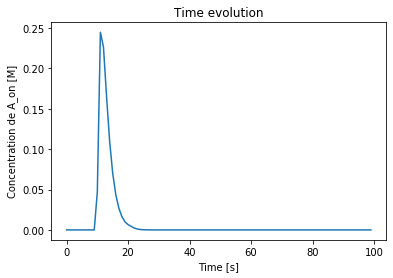

In [4]:
sol = odeint(Toilet_Flush, u, tspan, p)
plt.plot(sol[:,1])
plt.title("Time evolution")
plt.xlabel("Time [s]")
plt.ylabel("Concentration de A_on [M]")
plt.show()

### Cambios en k1

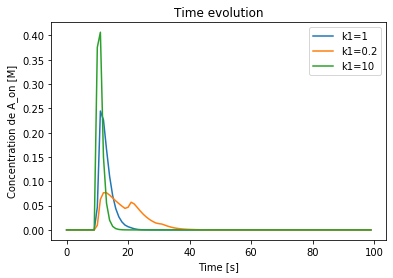

In [5]:
for p in [(1,1,0),(0.2,1,0),(10,1,0)]:
    sol = odeint(Toilet_Flush, u, tspan, p)
    plt.plot(sol[:,1], label="k1="+str(p[0]))
    plt.title("Time evolution")
    plt.xlabel("Time [s]")
    plt.ylabel("Concentration de A_on [M]")
plt.legend()
plt.show()

Conforme aumenta k1 la respuesta tiene una intensidad mayor (se observa una mayor concentración de A_on) y es más breve en el tiempo. Al disminuir k1 ocurre lo contrario: la respuesta tiene una intensidad menor y tarda más en iniciarse y finalizar. 

Si se disminuye tanto que da tiempo a que el segundo incremento del input se produzca antes de que finalice la respuesta se observa un segundo pico. 

### Cambios en k2

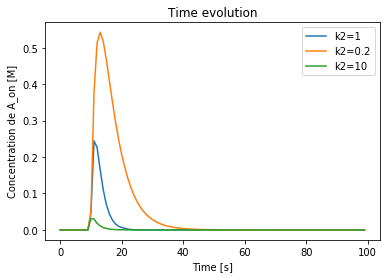

In [6]:
for p in [(1,1,0),(1,0.2,0),(1,10,0)]:
    sol = odeint(Toilet_Flush, u, tspan, p)
    plt.plot(sol[:,1], label="k2="+str(p[1]))
    plt.title("Time evolution")
    plt.xlabel("Time [s]")
    plt.ylabel("Concentration de A_on [M]")
plt.legend()
plt.show()

Conforme aumenta k2 la respuesta tiene una intensidad menor (se observa una menor concentración de A_on), al contrario de lo que ocurría al aumentar k1, pero también tiene una duración menor, lo cual también se observaba al aumentar k1. Cuando disminuye k1 ocurre lo contrario: respuestas más intensas pero también más lentas.  

### Cambios en k3

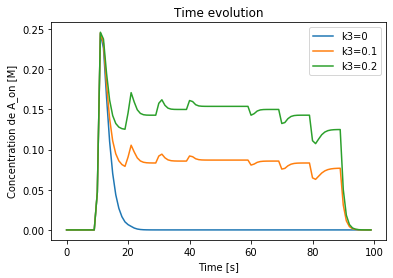

In [7]:
for p in [(1,1,0),(1,1,0.1),(1,1,0.2)]:
    sol = odeint(Toilet_Flush, u, tspan, p)
    plt.plot(sol[:,1], label="k3="+str(p[2]))
    plt.title("Time evolution")
    plt.xlabel("Time [s]")
    plt.ylabel("Concentration de A_on [M]")
plt.legend()
plt.show()

Conforme aumenta k3, tal y como se esperaba, el sistema pierde la capacidad de adaptación perfecta y, además, comienza a responder a los inputs en escalera, dejando de presentar una única respuesta. Esto se debe a que se la velocidad de recuperación del A_off consumido en la reacción es demasiada para que el sistema funcione. 

Se pierde la adaptación perfecta y además hay múltiples pulsos.


## 2.  Multiple output pulses

En este caso se introduce una variable nueva (proteína B) que simula el input y que está en menor concentración que A_off de manera que no la consume por completo en la primera respuesta, permitiendo que se produzcan multiples pulsos de respuesta ante el input que aumenta en escalera. 


In [8]:
def sistema_B_tot(u, t, k1, k2, k3):
    A_off, AB_on, AB_in = u
    
    B_tot = (np.ceil(t/10)/2)-0.5
    dA_off = k3*AB_in - k1*(B_tot - AB_on - AB_in)*A_off
    dAB_on = k1*(B_tot - AB_on - AB_in)*A_off - k2*AB_on 
    dAB_in = k2*AB_on - k3*AB_in
    
    return dA_off, dAB_on, dAB_in

In [9]:
# Parametros del paper 

k1=4
k2=4
k3=0
p = (k1, k2, k3)

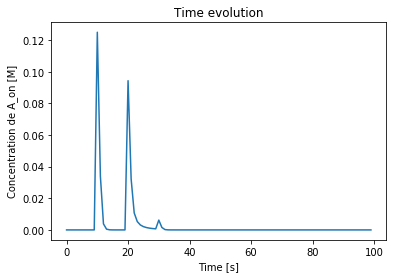

In [10]:
sol = odeint(sistema_B_tot, u, tspan, p)
plt.plot(sol[:,1])
plt.title("Time evolution")
plt.xlabel("Time [s]")
plt.ylabel("Concentration de A_on [M]")
plt.show()

### Cambios en k1

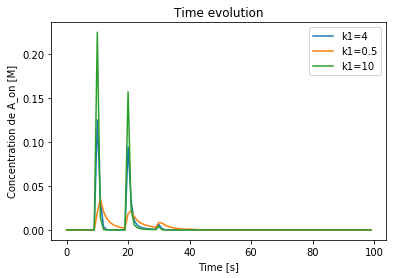

In [11]:
for p in [(4,4,0),(0.5,4,0),(10,4,0)]:
    sol = odeint(sistema_B_tot, u, tspan, p)
    plt.plot(sol[:,1], label="k1="+str(p[0]))
    plt.title("Time evolution")
    plt.xlabel("Time [s]")
    plt.ylabel("Concentration de A_on [M]")
plt.legend()
plt.show()

### Cambios en k2

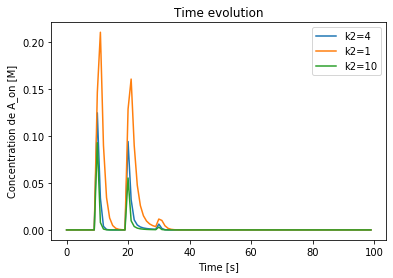

In [12]:
for p in [(4,4,0),(4,1,0),(4,10,0)]:
    sol = odeint(sistema_B_tot, u, tspan, p)
    plt.plot(sol[:,1], label="k2="+str(p[1]))
    plt.title("Time evolution")
    plt.xlabel("Time [s]")
    plt.ylabel("Concentration de A_on [M]")
plt.legend()
plt.show()

### Cambios en k3

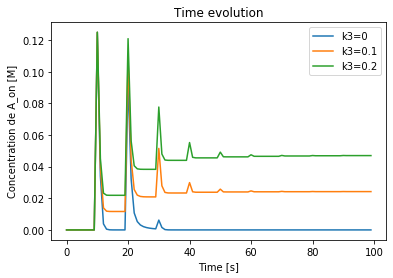

In [13]:
for p in [(4,4,0),(4,4,0.1),(4,4,0.2)]:
    sol = odeint(sistema_B_tot, u, tspan, p)
    plt.plot(sol[:,1], label="k3="+str(p[2]))
    plt.title("Time evolution")
    plt.xlabel("Time [s]")
    plt.ylabel("Concentration de A_on [M]")
plt.legend()
plt.show()